# IMPORTING LIBRARIES


In [88]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv('/content/drive/MyDrive/UPI/upi_data.csv')

# DATA PREPROCESSING


In [90]:
df

,Unnamed: 0,CUSTOMER_ID,GENDER,AVG_MONTHLY_TRANSACTIONS,RESIDENTIAL,Bank_type,SUBSCRIPTION_STATUS
0,0,1000,F,1210,Urban,Cooperative,1
1,1,1001,F,10401,Rural,Undertaking,0
2,2,1002,M,1210,Urban,Cooperative,1
3,3,1003,F,400,Rural,Cooperative,1
4,4,1004,M,3340,Rural,Undertaking,0
...,...,...,...,...,...,...,...
4995,4995,5995,M,96874,Rural,Cooperative,0
4996,4996,5996,M,7210,Rural,Undertaking,1
4997,4997,5997,M,1100,Rural,Undertaking,1
4998,4998,5998,M,22652,Urban,Cooperative,0


In [91]:
#Dropping unnecessary rows
df=df.iloc[:,1:7]

In [92]:
#Resetting the index value
df=df.set_index("CUSTOMER_ID")

In [93]:
df

,GENDER,AVG_MONTHLY_TRANSACTIONS,RESIDENTIAL,Bank_type,SUBSCRIPTION_STATUS
CUSTOMER_ID,,,,,
1000,F,1210,Urban,Cooperative,1
1001,F,10401,Rural,Undertaking,0
1002,M,1210,Urban,Cooperative,1
1003,F,400,Rural,Cooperative,1
1004,M,3340,Rural,Undertaking,0
...,...,...,...,...,...
5995,M,96874,Rural,Cooperative,0
5996,M,7210,Rural,Undertaking,1
5997,M,1100,Rural,Undertaking,1


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1000 to 5999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GENDER                    5000 non-null   object
 1   AVG_MONTHLY_TRANSACTIONS  5000 non-null   int64 
 2   RESIDENTIAL               5000 non-null   object
 3   Bank_type                 5000 non-null   object
 4   SUBSCRIPTION_STATUS       5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [95]:
df.shape

(5000, 5)

In [96]:
urban_subs = df[df['RESIDENTIAL']=='Urban']
urban_subs.groupby(['SUBSCRIPTION_STATUS']).size().head()

SUBSCRIPTION_STATUS
0    1273
1    1237
dtype: int64

In [97]:
rural_subs = df[df['RESIDENTIAL']=='Rural']
urban_subs.groupby(['SUBSCRIPTION_STATUS']).size().head()

SUBSCRIPTION_STATUS
0    1273
1    1237
dtype: int64

In [98]:
urban_subs['RESIDENTIAL'].value_counts()

Urban    2510
Name: RESIDENTIAL, dtype: int64

In [99]:
rural_subs.groupby(['RESIDENTIAL','GENDER','SUBSCRIPTION_STATUS']).size()

RESIDENTIAL  GENDER  SUBSCRIPTION_STATUS
Rural        F       0                      611
                     1                      609
             M       0                      637
                     1                      633
dtype: int64

In [100]:
rural_subs = df[df['RESIDENTIAL']=='Rural']
rural_subs.groupby(['SUBSCRIPTION_STATUS']).size().head()

SUBSCRIPTION_STATUS
0    1248
1    1242
dtype: int64

In [101]:
rural_subs['RESIDENTIAL'].value_counts()

Rural    2490
Name: RESIDENTIAL, dtype: int64

In [102]:
df['AVG_MONTHLY_TRANSACTIONS'].mode()

0    2500
Name: AVG_MONTHLY_TRANSACTIONS, dtype: int64

In [103]:
#checking the labels of each feature
for col in df.columns:
    print(col, ':',len(df[col].unique()),'labels')

GENDER : 2 labels
AVG_MONTHLY_TRANSACTIONS : 50 labels
RESIDENTIAL : 2 labels
Bank_type : 4 labels
SUBSCRIPTION_STATUS : 2 labels


# FEATURE SCALING

In [104]:
#Using One hot encoding and dropping features that cause multicollinearity
dummy_data_set=pd.get_dummies(df,drop_first=True)


In [105]:
dummy_data_set['SUBSCRIPTION_STATUS']

CUSTOMER_ID
1000    1
1001    0
1002    1
1003    1
1004    0
       ..
5995    0
5996    1
5997    1
5998    0
5999    1
Name: SUBSCRIPTION_STATUS, Length: 5000, dtype: int64

<Axes: xlabel='SUBSCRIPTION_STATUS', ylabel='count'>

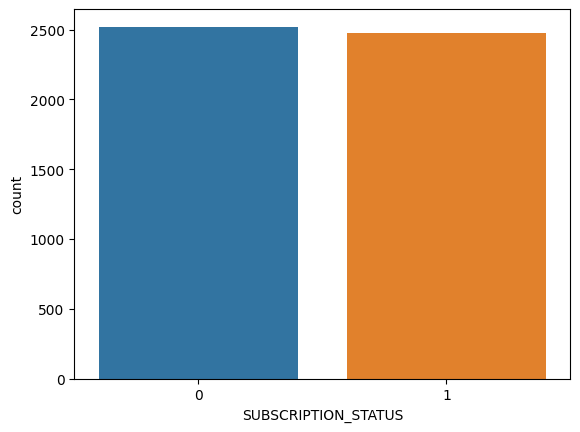

In [106]:
#checking for imbalanced data
sb.countplot(x ='SUBSCRIPTION_STATUS', data = dummy_data_set)

In [107]:
dummy_data_set.describe()

,AVG_MONTHLY_TRANSACTIONS,SUBSCRIPTION_STATUS,GENDER_M,RESIDENTIAL_Urban,Bank_type_Gvt,Bank_type_Pvt,Bank_type_Undertaking
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.913269e+06,0.495800,0.509400,0.502000,0.261400,0.250000,0.253200
std,1.360657e+07,0.500032,0.499962,0.500046,0.439441,0.433056,0.434888
min,1.530000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.260000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.340000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,9.420000e+03,1.000000,1.000000,1.000000,1.000000,0.250000,1.000000
max,9.915320e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
#Selecting Independent Variables
X=dummy_data_set.iloc[:,[0,2,3,4,5,6]]

In [109]:
X

,AVG_MONTHLY_TRANSACTIONS,GENDER_M,RESIDENTIAL_Urban,Bank_type_Gvt,Bank_type_Pvt,Bank_type_Undertaking
CUSTOMER_ID,,,,,,
1000,1210,0,1,0,0,0
1001,10401,0,0,0,0,1
1002,1210,1,1,0,0,0
1003,400,0,0,0,0,0
1004,3340,1,0,0,0,1
...,...,...,...,...,...,...
5995,96874,1,0,0,0,0
5996,7210,1,0,0,0,1
5997,1100,1,0,0,0,1


In [110]:
#Selecting Response variable
y=dummy_data_set.iloc[:,1:2]

In [111]:
y

,SUBSCRIPTION_STATUS
CUSTOMER_ID,
1000,1
1001,0
1002,1
1003,1
1004,0
...,...
5995,0
5996,1
5997,1


# MODEL TRAINING

In [112]:
## performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [113]:
#prepruning : creating a dictionay of parameters to train the model on
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2'],
}

In [114]:
#importing decision tree model using sklearn and grid search CV
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV

In [115]:
#creating an instance
treemodel=DecisionTreeClassifier()

In [116]:
#giving input to gridsearch cv to find parameters
grid=GridSearchCV(treeclassifier,param_grid=param,cv=5,scoring='accuracy')

In [117]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [118]:
#finds the ideal parameters using cross validation
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

# PERFORMANCE ANALYSIS

In [119]:
y_pred=grid.predict(X_test)

In [120]:
#finding the accuracy score
from sklearn.metrics import accuracy_score

In [121]:
score=accuracy_score(y_test,y_pred)

In [122]:
score

0.497

In [123]:
#generating classification report
from sklearn.metrics import confusion_matrix,classification_report

In [124]:
grid.best_score_

0.52225

In [125]:
#drawing confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[322 189]
 [314 175]]
              precision    recall  f1-score   support

           0       0.51      0.63      0.56       511
           1       0.48      0.36      0.41       489

    accuracy                           0.50      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.50      0.49      1000



Text(95.72222222222221, 0.5, 'Truth')

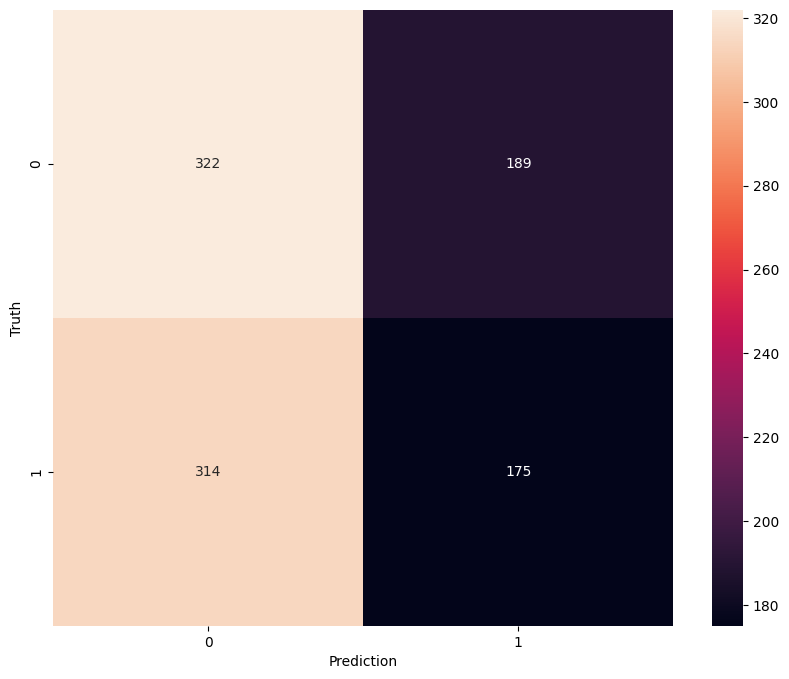

In [126]:
#visualization of confusion matrix using seaborn
import seaborn as sb

plt.figure(figsize=(10,8))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [127]:
#using the max depth parameter to visualize the decision tree
treeclassifier=DecisionTreeClassifier(max_depth=4)

In [128]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'x[0] <= 5961.5\ngini = 0.5\nsamples = 4000\nvalue = [2010, 1990]'),
 Text(0.25, 0.7, 'x[0] <= 1443.5\ngini = 0.499\nsamples = 2411\nvalue = [1246, 1165]'),
 Text(0.125, 0.5, 'x[0] <= 407.5\ngini = 0.5\nsamples = 1150\nvalue = [572, 578]'),
 Text(0.0625, 0.3, 'x[4] <= 0.5\ngini = 0.495\nsamples = 151\nvalue = [83, 68]'),
 Text(0.03125, 0.1, 'gini = 0.489\nsamples = 120\nvalue = [69, 51]'),
 Text(0.09375, 0.1, 'gini = 0.495\nsamples = 31\nvalue = [14, 17]'),
 Text(0.1875, 0.3, 'x[0] <= 775.0\ngini = 0.5\nsamples = 999\nvalue = [489, 510]'),
 Text(0.15625, 0.1, 'gini = 0.495\nsamples = 303\nvalue = [136, 167]'),
 Text(0.21875, 0.1, 'gini = 0.5\nsamples = 696\nvalue = [353, 343]'),
 Text(0.375, 0.5, 'x[1] <= 0.5\ngini = 0.498\nsamples = 1261\nvalue = [674, 587]'),
 Text(0.3125, 0.3, 'x[0] <= 5139.5\ngini = 0.493\nsamples = 623\nvalue = [348, 275]'),
 Text(0.28125, 0.1, 'gini = 0.49\nsamples = 543\nvalue = [310, 233]'),
 Text(0.34375, 0.1, 'gini = 0.499\nsamples = 80\nvalue

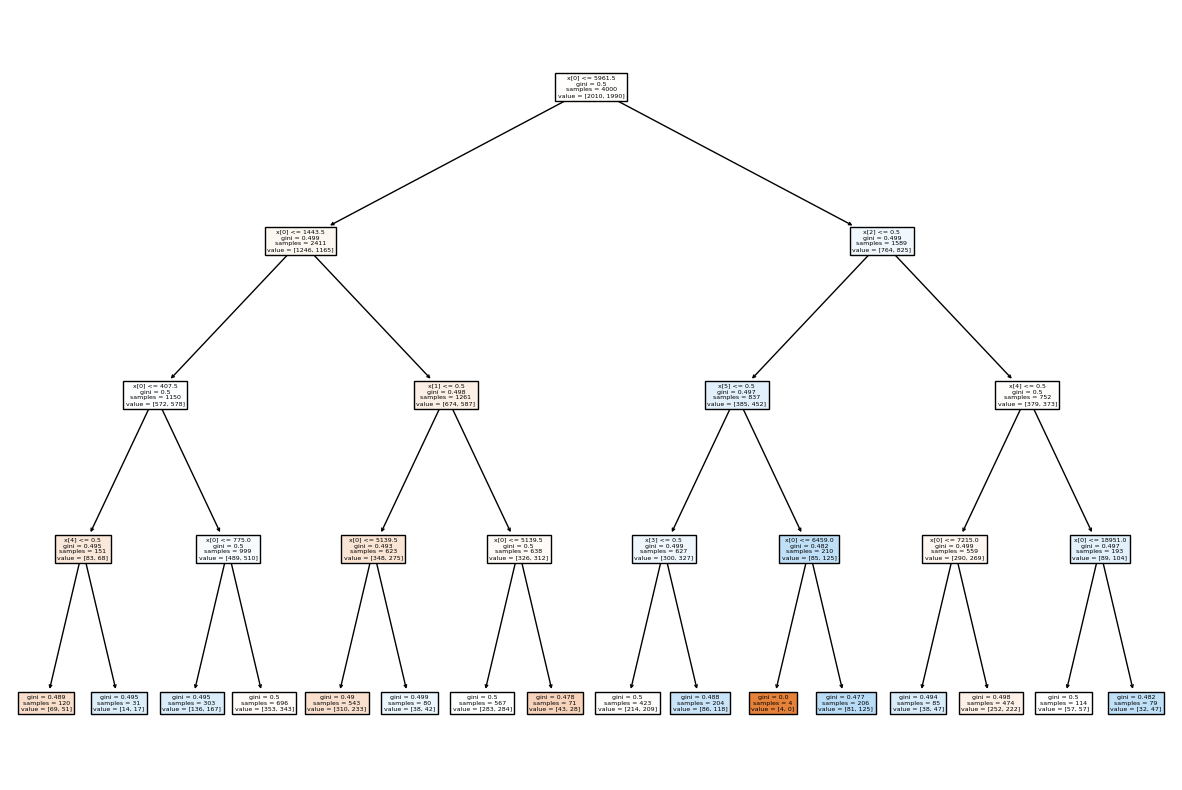

In [129]:
##Visualizing the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

# PREDICTION

In [130]:
#creating a pickle file to predict new input data using joblib
import joblib

In [131]:
#naming the model
joblib.dump(treeclassifier,'subscription_probability')

['subscription_probability']

In [132]:
#creating the model
model=joblib.load('subscription_probability')

In [133]:
#input column labels
X_train.columns

Index(['AVG_MONTHLY_TRANSACTIONS', 'GENDER_M', 'RESIDENTIAL_Urban',
       'Bank_type_Gvt', 'Bank_type_Pvt', 'Bank_type_Undertaking'],
      dtype='object')

In [134]:
#predicting the probability
model.predict([[100000,1,0,0,0,1]])

array([1])

# CONCLUSION



Here we are able predict SUCCESSULLY the probability of paid subscription as high for the following individual.

*  A male living with an average annual transaction of 100000 on the payment app and lives in rural area with a bank account account in a government  undertaking bank.

*   This model can no be used to iterate on the new data and verify the probability of new customers joining.

*   Therefore, the model can be helpful to predict the customer response before rolling out features to a larger audience.Thus it helps companies to estimate the chances for the product to be a success.

*   Even though the accuracy is low for now, adding more meaningful parameter can make the model yeild better accuracy.






